In [1]:
import warnings
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from game import Game
from models import Player, Land, MockPlayer
from utils.fc import get_df_over_increase, create_mock_game, simulation, merge_dfs, get_diff, get_df_columns_mean, get_df_columns_sum
from utils.mpl import plot_scatter, plot_line_with_scatter

In [2]:
df = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,group=False)
df1 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='common', group=False)
df2 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='uncommon', group=False)
df3 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='rare', group=False)
df4 = simulation(my_defense_bonus=0, my_attack_bonus=65, enemy_defense_bonus=13.8,hero='lyz', rarity='epic', group=False)
df = merge_dfs(dfs=[df, df1, df2, df3, df4], column='energy', pk='day', limits=(20,30))

# COMPARING ATTACKS BETWEEN RARITYS

In [3]:
df

,day,no_hero,common,uncommon,rare,epic
20,11.0,-56.93,-40.74,-27.97,-15.76,0.0
21,11.0,-54.30,-42.09,-30.48,-14.66,0.0
22,12.0,-55.19,-37.01,-30.84,-16.47,0.0
23,12.0,-57.79,-44.62,-32.04,-10.91,0.0
24,13.0,-55.70,-41.14,-23.78,-14.91,0.0
25,13.0,-55.92,-40.52,-27.53,-10.28,0.0
26,14.0,-54.01,-39.52,-22.80,-15.15,0.0
27,14.0,-51.91,-43.05,-24.64,-15.73,0.0
28,15.0,-55.82,-38.50,-27.53,-9.67,0.0
29,15.0,-57.14,-38.58,-27.23,-16.54,0.0


# TOTAL ENERGY AFTER 10 ATTACKS

In [4]:
df_sum = get_df_columns_sum(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_sum

,no_hero,common,uncommon,rare,epic
0,-554.71,-405.77,-274.84,-140.08,0.0


Text(0.5, 1.0, 'Total Energy Spent After 10 Attacks')

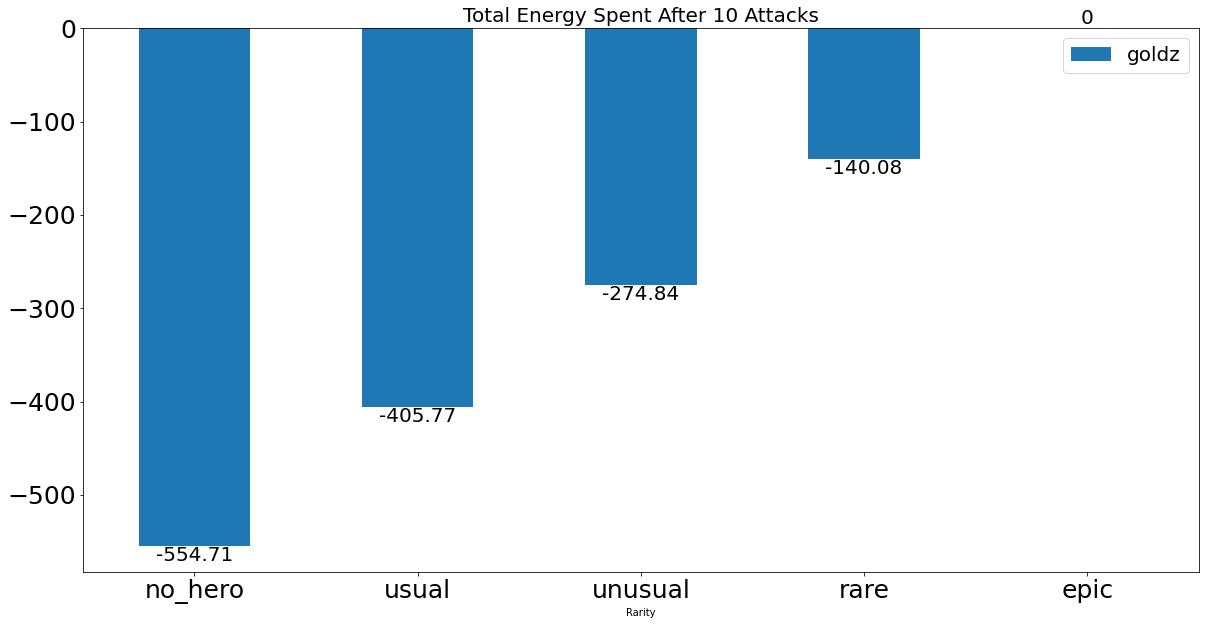

In [5]:
df_sum = pd.DataFrame({'heroes':df_sum.columns, 'goldz':df_sum.iloc[0].to_list()})

ax = df_sum.plot.bar(x='heroes', y='goldz', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Total Energy Spent After 10 Attacks", fontsize=20)

# ENERGY AVERAGE ON EACH ATTACK

In [6]:
df_mean = get_df_columns_mean(df, ['no_hero','common', 'uncommon', 'rare', 'epic'])
df_mean

,no_hero,common,uncommon,rare,epic
0,-55.471,-40.577,-27.484,-14.008,0.0


Text(0.5, 1.0, 'Energy Average on Each attack')

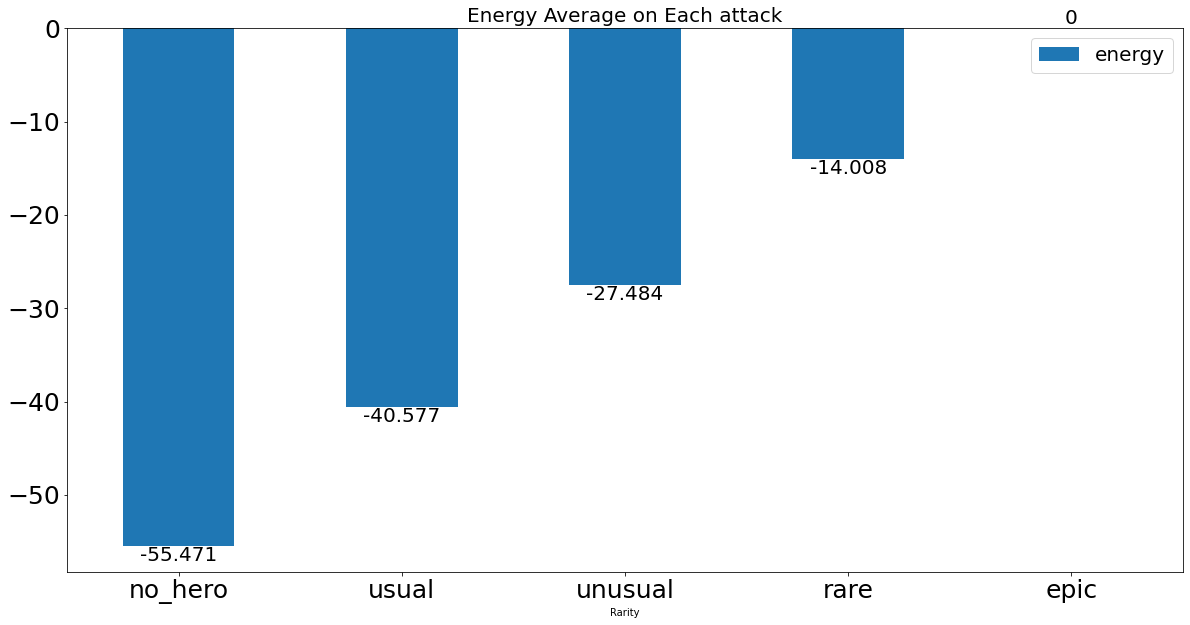

In [7]:

df_mean = pd.DataFrame({'heroes':df_mean.columns, 'energy':df_mean.iloc[0].to_list()})

ax = df_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})
ax.set_ylabel(None,fontsize=20)


ax.set_title(f"Energy Average on Each attack", fontsize=20)

# ENERGY DIFFERENCE COMPARED TO NO HERO

In [8]:
df = get_diff(df=df)
df

,day,common,uncommon,rare,epic
20,11.0,16.19,28.96,41.17,56.93
21,11.0,12.21,23.82,39.64,54.30
22,12.0,18.18,24.35,38.72,55.19
23,12.0,13.17,25.75,46.88,57.79
24,13.0,14.56,31.92,40.79,55.70
25,13.0,15.40,28.39,45.64,55.92
26,14.0,14.49,31.21,38.86,54.01
27,14.0,8.86,27.27,36.18,51.91
28,15.0,17.32,28.29,46.15,55.82
29,15.0,18.56,29.91,40.60,57.14


# TOTAL ENERGY SPENT COMPARED TO NO HERO

In [9]:
df_diff_sum = get_df_columns_sum(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_sum

,common,uncommon,rare,epic
0,148.94,279.87,414.63,554.71


Text(0.5, 1.0, 'Total Diff Energy Compared to No Hero')

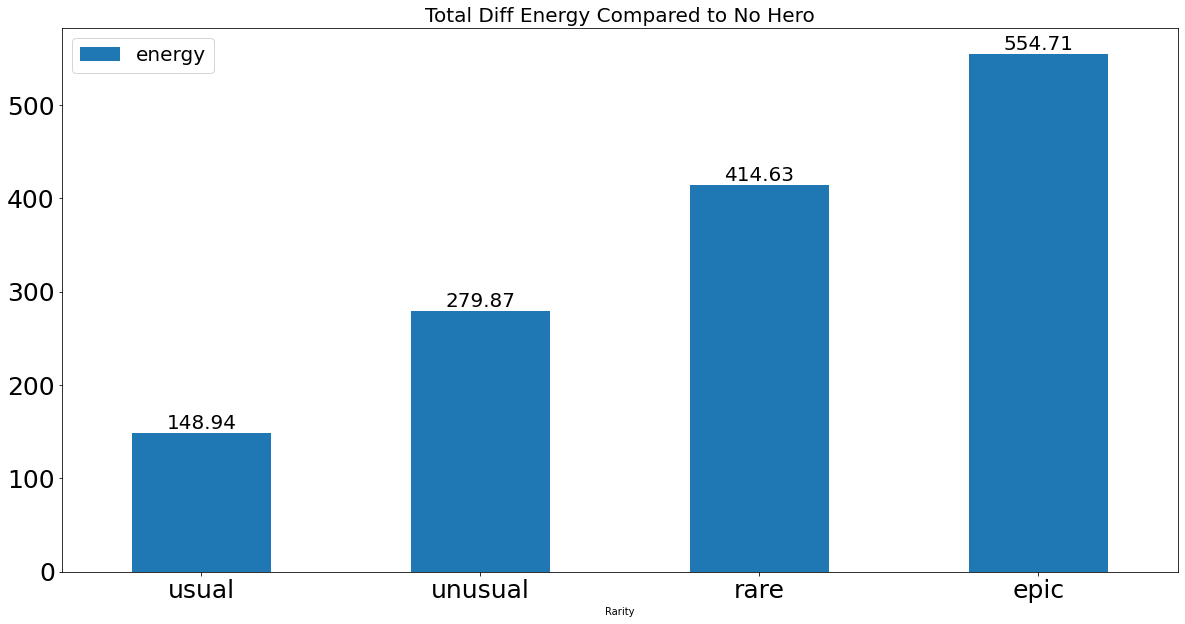

In [10]:
df_diff_sum = pd.DataFrame({'heroes':df_diff_sum.columns, 'energy':df_diff_sum.iloc[0].to_list()})

ax = df_diff_sum.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Total Diff Energy Compared to No Hero", fontsize=20)

# ENERGY DIFFERENCE SPENT PER ATTACK COMPARED TO NO HERO


In [11]:
df_diff_mean = get_df_columns_mean(df, ['common', 'uncommon', 'rare', 'epic'])
df_diff_mean

,common,uncommon,rare,epic
0,14.894,27.987,41.463,55.471


Text(0.5, 1.0, 'Diff Energy Average per Attack')

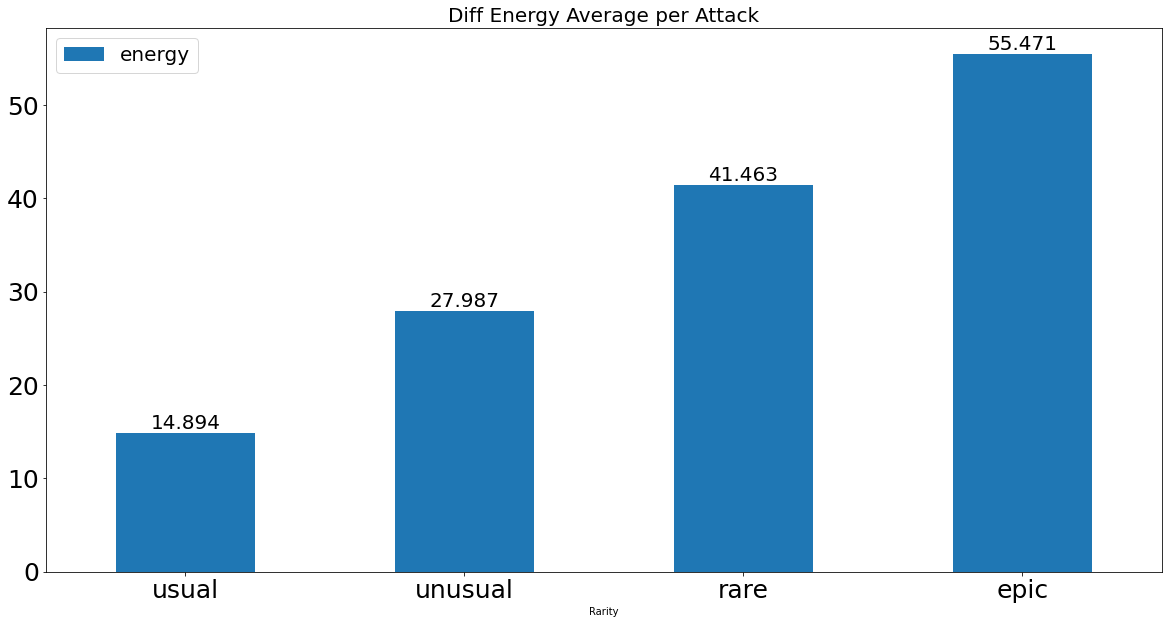

In [12]:
df_diff_mean = pd.DataFrame({'heroes':df_diff_mean.columns, 'energy':df_diff_mean.iloc[0].to_list()})

ax = df_diff_mean.plot.bar(x='heroes', y='energy', rot=0, figsize=(20,10), fontsize=25, xlabel='Rarity')

for container in ax.containers:
    ax.bar_label(container, fontsize=20)


ax.legend(prop={'size': 20})

ax.set_title(f"Diff Energy Average per Attack", fontsize=20)